<a href="https://colab.research.google.com/github/Kamani-28/Ait_664/blob/main/ny_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Install kagglehub if not already installed
!pip install kagglehub

# Download dataset from Kaggle
import kagglehub

# Download New York Housing Market Dataset
df_ny = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")

# Display the path to dataset files
print("Path to dataset files:", df_ny)

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/new-york-housing-market/versions/1


                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                

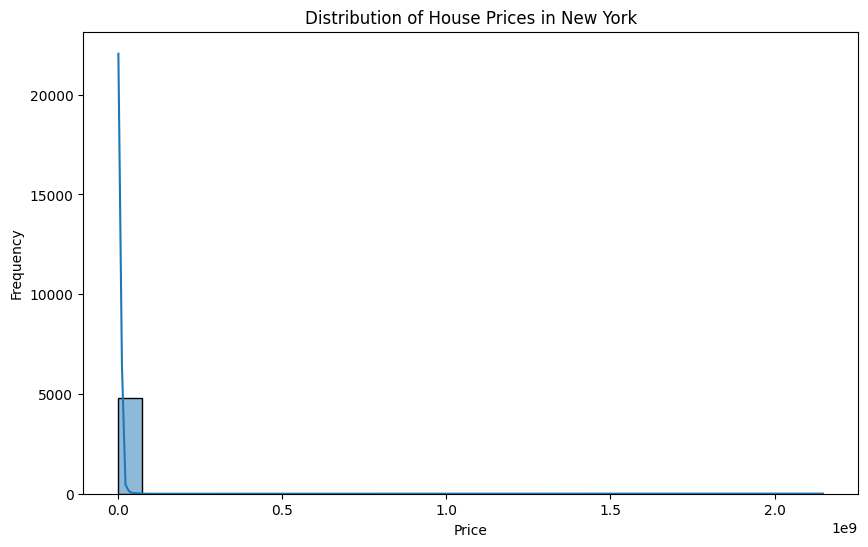

In [55]:
# Load the dataset
# Correct the path to the CSV file by using os.path.join
import os
data = pd.read_csv(os.path.join(df_ny, 'NY-House-Dataset.csv'))

# Display the first few rows of the dataset
print(data.head())

# Display summary information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], bins=30, kde=True)
plt.title('Distribution of House Prices in New York')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [69]:
# Check the columns in the DataFrame
print(data.columns)

# Display the data types of each column
print(data.dtypes)


Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object


In [70]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


In [72]:
# Example: If you have categorical columns, you can encode them
# Note: Replace 'categorical_column_name' with your actual column name(s)
data = pd.get_dummies(data, columns=['BROKERTITLE'], drop_first=True)


In [75]:
# Fill missing values or drop them
# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Optional: Encode categorical variables if present
# For example: data = pd.get_dummies(data, columns=['category_column'])

# Split the dataset into features and target variable
X = data.drop('PRICE', axis=1)  # Features - Removed extra space in column name
y = data['PRICE']                # Target variable - Removed extra space in column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Check the data types of the columns
print(X_train.dtypes)


TYPE                                        object
BEDS                                         int64
BATH                                       float64
PROPERTYSQFT                               float64
ADDRESS                                     object
                                            ...   
BROKERTITLE_Brokered by eXp Realty BKNY       bool
BROKERTITLE_Brokered by eXp Realty NYC        bool
BROKERTITLE_Brokered by qvtopservice          bool
BROKERTITLE_Built by Toll Brothers            bool
BROKERTITLE_NoBroker                          bool
Length: 1050, dtype: object


In [83]:
# Drop the ADDRESS column (or any other irrelevant column)
X = X.drop(['ADDRESS'], axis=1)


In [84]:
# One-hot encode categorical columns (excluding dropped ones)
X = pd.get_dummies(X, drop_first=True)


In [85]:
# One-hot encode categorical columns for X_test
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test with X_train to ensure they match
X_test = X_test.reindex(columns=X.columns, fill_value=0)


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'price' is the target variable in your DataFrame
X = data.drop(columns=['price', 'ADDRESS', 'BROKER'], errors='ignore')  # Replace with actual non-numeric columns
y = data['PRICE']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train: (3840, 13453)
Shape of y_train: (3840,)
Shape of X_test: (961, 13453)
Shape of y_test: (961,)


In [89]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)


Regression Report

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1.4431820285935865e-08
Mean Squared Error: 4.0886769225813445e-16
R-squared: 1.0


In [96]:
# Check the column names in the DataFrame
print(data.columns)

Index(['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'ADDRESS', 'STATE',
       'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       ...
       'BROKERTITLE_Brokered by Yoreevo',
       'BROKERTITLE_Brokered by Yoreevo Llc',
       'BROKERTITLE_Brokered by Your Home Sold Guaranteed Realty Advisor LLC',
       'BROKERTITLE_Brokered by YourHomeSold Guarantee Realty',
       'BROKERTITLE_Brokered by eXp Realty BKNY',
       'BROKERTITLE_Brokered by eXp Realty NYC',
       'BROKERTITLE_Brokered by qvtopservice',
       'BROKERTITLE_Built by Toll Brothers', 'BROKERTITLE_NoBroker',
       'price_category'],
      dtype='object', length=1052)


For Regression predicting house prices

In [97]:
# Set the features and target variable
X = data.drop(columns=['PRICE', 'ADDRESS', 'STATE', 'price_category'], errors='ignore')  # Drop unnecessary columns
y = data['PRICE']  # Use the actual price as the target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)


For classification predicting price categories.

In [98]:
# Set the features and target variable
X = data.drop(columns=['price_category', 'ADDRESS', 'STATE', 'PRICE'], errors='ignore')  # Drop unnecessary columns
y = data['price_category']  # Use price categories as the target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the classification model
from sklearn.ensemble import RandomForestClassifier
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_class_train, y_class_train)

# Make predictions
y_class_pred = clf_model.predict(X_class_test)


In [103]:
print(data.dtypes)


TYPE                                       object
PRICE                                       int64
BEDS                                        int64
BATH                                      float64
PROPERTYSQFT                              float64
                                           ...   
BROKERTITLE_Brokered by eXp Realty NYC       bool
BROKERTITLE_Brokered by qvtopservice         bool
BROKERTITLE_Built by Toll Brothers           bool
BROKERTITLE_NoBroker                         bool
price_category                             object
Length: 1052, dtype: object


Classification report

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your DataFrame
# Drop unnecessary columns
X = data.drop(columns=['price_category', 'ADDRESS', 'STATE'], errors='ignore')  # Drop your target and non-relevant columns
y = data['price_category']  # Your target variable (ensure it's the correct one)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a classification model
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_train)

# Make predictions
y_pred = clf_model.predict(X_test)

# Optionally, evaluate your model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      0.99      1.00       472
         Low       0.99      1.00      1.00       489

    accuracy                           1.00       961
   macro avg       1.00      1.00      1.00       961
weighted avg       1.00      1.00      1.00       961



Clustering model

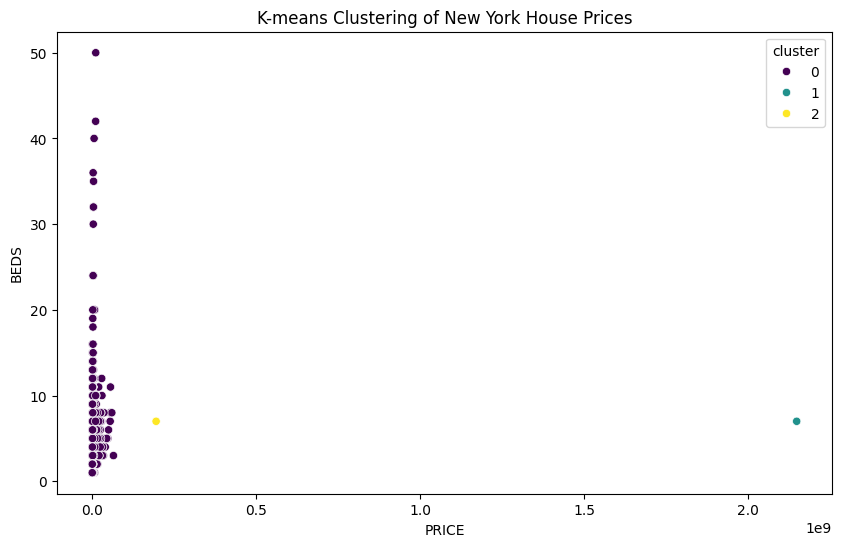

In [106]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
data['cluster'] = kmeans.fit_predict(X) # Assuming 'X' contains your features for clustering

# Choose two relevant features from your data for visualization
# Replace 'actual_feature_1' and 'actual_feature_2' with your desired column names
feature_1 = 'PRICE'
feature_2 = 'BEDS'

# Visualize clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=feature_1, y=feature_2, hue='cluster', palette='viridis')
plt.title('K-means Clustering of New York House Prices')
plt.show()